# Custom Energy Function

In [1]:
import chilife as xl
import pickle
import matplotlib.pyplot as plt
import numpy as np

from chilife import EnergyFunc

plt.style.use('chiLife')

In [2]:
with open('R1_Data.pkl', 'rb') as f:
    data = pickle.load(f)
omp = xl.fetch('1omp')
anf = xl.fetch('1anf')

In [3]:
class CustomEnergyFunc(xl.ljEnergyFunc):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.ljFunc = super().__call__
        self.sa_weight = 0.078 
        self.func_forgive = 0.94
    
    def __call__(self, rotens):
        ljE = self.ljFunc(rotens, forgive=self.func_forgive)
        SASA = rotens.get_sasa()
        return ljE - self.sa_weight * SASA
         
        

my_sfxn = CustomEnergyFunc(functional=xl.get_lj_energy)

SL1 = xl.SpinLabel('R1M', 41, anf, energy_func=my_sfxn)
SL2 = xl.SpinLabel('R1M', 238, anf, energy_func=my_sfxn)
SL2 = xl.SpinLabel('R1M', 345, anf, energy_func=my_sfxn)

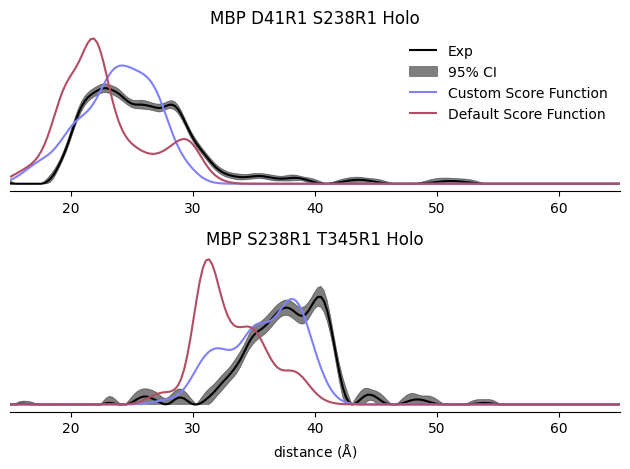

In [4]:
labels = ('Custom Score Function', 'Default Score Function')
fig, axs = plt.subplots(2)
for ax, cstruct in zip(axs, (("41", "238", 'Holo'), ("238", "345", 'Holo'))):
    exp = data[cstruct]
    ax.plot(exp.r, exp.P, color='k', label='Exp')
    ax.fill_between(exp.r, *exp.P95, color='k', alpha=0.5, label='95% CI')
    
    for i, efunc in enumerate((my_sfxn, xl.ljEnergyFunc(xl.get_lj_scwrl))):
        SL1 = xl.SpinLabel('R1M', cstruct[0], anf, energy_func = efunc)
        SL2 = xl.SpinLabel('R1M', cstruct[1], anf, energy_func = efunc)
        dd = xl.distance_distribution(SL1, SL2, exp.r)
        ax.plot(exp.r, dd, label=labels[i])
        
    ax.set_yticks([])
    ax.set_xlim(15, 65)
    for spine in ['left', 'top', 'right']:
        ax.spines[spine].set_visible(False)
    
axs[0].set_title('MBP D41R1 S238R1 Holo')
axs[1].set_title('MBP S238R1 T345R1 Holo')
        
axs[0].legend(frameon=False)
axs[1].set_xlabel(r'distance ($\rm\AA$)')

plt.tight_layout()
plt.show()

    


